In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Libraries imported ✅")

Libraries imported ✅


In [3]:
df = pd.read_csv("fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [7]:
# Drop identifier / text-heavy columns
cols_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
    'first', 'last', 'street', 'city', 'state', 'zip',
    'job', 'dob', 'trans_num'
]

df = df.drop(columns=cols_to_drop)
df.head()


,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [8]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X.shape, y.shape


((555719, 9), (555719,))

In [9]:
X = pd.get_dummies(X, drop_first=True)
X.shape

(555719, 21)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(), y_test.value_counts()


(is_fraud
 0    442859
 1      1716
 Name: count, dtype: int64,
 is_fraud
 0    110715
 1       429
 Name: count, dtype: int64)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train baseline model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

ROC-AUC Score: 0.8224671443205518


In [14]:
# Logistic Regression with class weight balancing
lr_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_balanced.fit(X_train_scaled, y_train)

y_pred_bal = lr_balanced.predict(X_test_scaled)
y_prob_bal = lr_balanced.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_bal))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_bal))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95    110715
           1       0.03      0.73      0.05       429

    accuracy                           0.90    111144
   macro avg       0.51      0.81      0.50    111144
weighted avg       1.00      0.90      0.94    111144

ROC-AUC Score: 0.9001470943213256


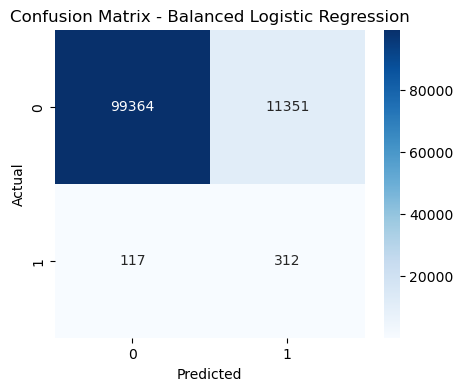

In [15]:
cm = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.savefig("results/confusion_matrix_balanced.png")
plt.show()

In [16]:
import pickle

with open("models/fraud_model.pkl", "wb") as f:
    pickle.dump(lr_balanced, f)

with open("models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved ✅")

Model and scaler saved ✅
